# Random Walks

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import random

## 1D
Start at position 0. Take N steps, moving left or right uniformly at random for each step.

In [109]:
def random_walk(N):
    position = 0
    positions = [position]
    for j in range(N):
        if random.randint(0, 1) == 0:
            position += 1
        else:
            position -= 1

        positions.append(position)

    return positions

def k_random_walks(trials, N):
    end_points = list()
    for i in range(trials):
        trial = random_walk(N)
        end_points.append(trial[-1])
    return end_points

def positions_at_timestep(trials, N, square=False):
    positions = [[] for i in range(N)]
    for i in range(trials):
        walk = random_walk(N)
        for j in range(N):
            positions[j].append(walk[j]**2 if square else walk[j])
            
    
    averages = [np.mean(position) for position in positions]
    uncertainties = [uncertainty(position) for position in positions]

    return averages, uncertainties


def random_walk_to_start():
    position = 1 if random.randint(0, 1) == 0 else -1
    steps = 1
    while position != 0:
        if random.randint(0, 1) == 0:
            position += 1
        else:
            position -= 1
        steps +=1

    return steps

In [110]:
end_points = k_random_walks(10000, 10)
print('Mean:', np.mean(end_points))
print('Variance:', np.var(end_points, ddof=1))

Mean: 0.0192
Variance: 9.93742510251


## Plotting One Walk

In [111]:
def plot_walk(positions):
    plt.plot(range(len(positions)), positions)
    plt.ylabel('Step Number')
    plt.xlabel('Position')
    plt.show()

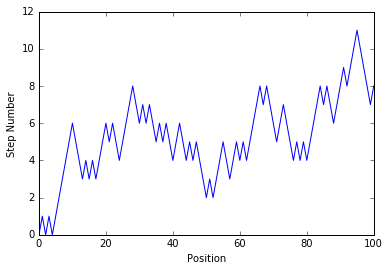

In [112]:
plot_walk(random_walk(100))

## Plotting the Distribution of End Points for k Walks

In [113]:
def plot_k_walks(end_points):    
    plt.hist(end_points, bins=len(set(end_points))*2+1)
    plt.ylabel('Count')
    plt.xlabel('End Position')
    plt.show()

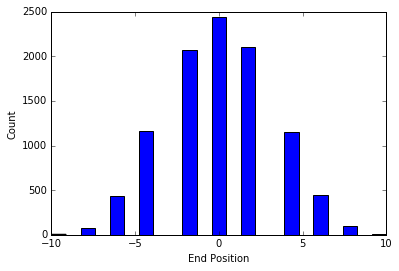

In [114]:
plot_k_walks(k_random_walks(10000, 10))

## Uncertainty vs Sample Size

In [115]:
def uncertainty(samples):
    return (np.var(samples, ddof=1) / len(samples))**0.5

end_points = k_random_walks(1000, 10)
print('Mean:', np.mean(end_points))
print('Uncertainty:', uncertainty(end_points))
print('Variance:', np.var(end_points, ddof=1))

Mean: 0.11
Uncertainty: 0.0989630925835
Variance: 9.79369369369


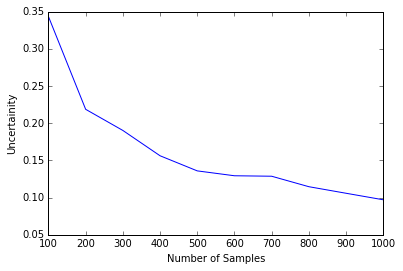

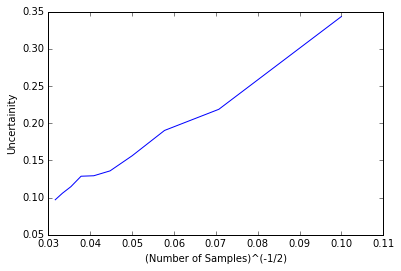

In [116]:
sample_sizes = []
uncertainties = []
for samples in range(100, 1001, 100):
    end_points = k_random_walks(samples, 10)
    sample_sizes.append(samples)
    uncertainties.append(uncertainty(end_points))
    
plt.plot(sample_sizes, uncertainties)
plt.ylabel('Uncertainity')
plt.xlabel('Number of Samples')
plt.show()

plt.plot(list(map(lambda x: x**-.5, sample_sizes)), uncertainties)
plt.ylabel('Uncertainity')
plt.xlabel('(Number of Samples)^(-1/2)')
plt.show()

## Mean End Position with Uncertainty

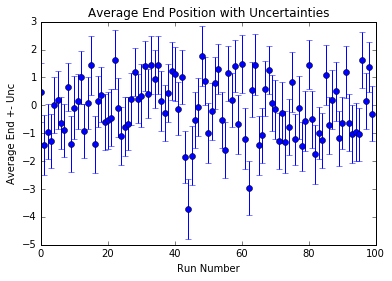

In [117]:
averages = []
uncertainties = []
for i in range(100):
    end_points = k_random_walks(100, 100)
    averages.append(np.mean(end_points))
    uncertainties.append(uncertainty(end_points))
    
plt.errorbar(range(100), averages, yerr=uncertainties, fmt='o')
plt.title('Average End Position with Uncertainties')
plt.xlabel('Run Number')
plt.ylabel('Average End +- Unc')
plt.show()

## Average Position with Uncertainties for One Walk

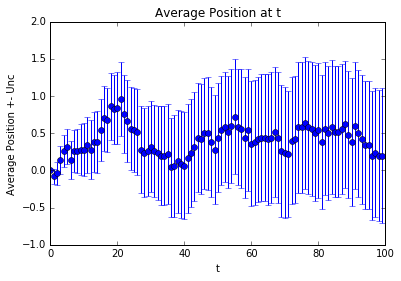

In [128]:
averages, uncertainties = positions_at_timestep(100, 100)

plt.errorbar(range(100), averages, yerr=uncertainties, fmt='o')
plt.title('Average Position at t')
plt.xlabel('t')
plt.ylabel('Average Position +- Unc')
plt.show()

Best fit line: 0.96t + 3.23


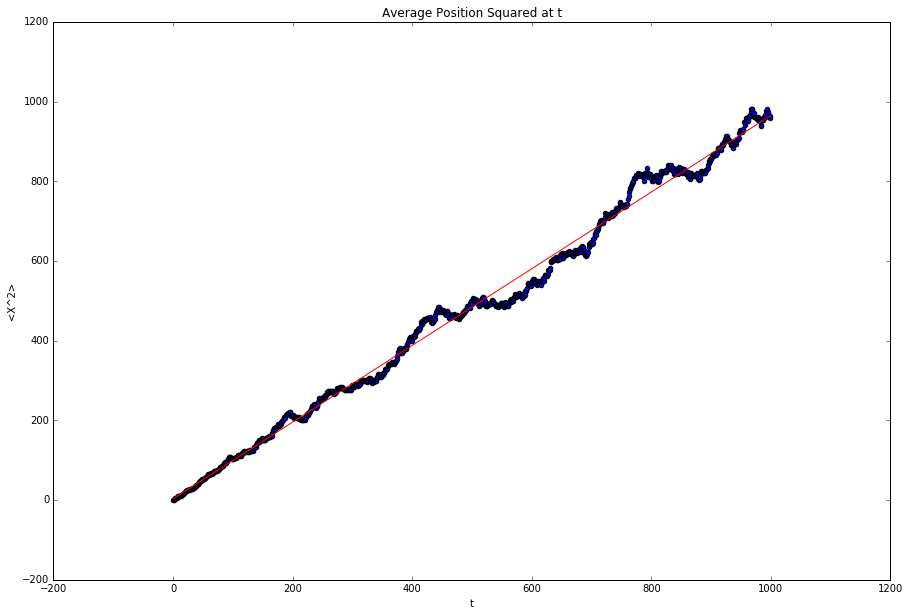

In [127]:
averages, _ = positions_at_timestep(100, 1000, square=True)

t = np.arange(1000)
fit = np.polyfit(t, averages, deg=1)
print('Best fit line: {0:.2f}t + {1:.2f}'.format(fit[0], fit[1]))

plt.plot(t, fit[0] * t + fit[1], color='red')
plt.scatter(t, averages)



plt.title('Average Position Squared at t')
plt.xlabel('t')
plt.ylabel('<X^2>')


fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

